# Lab04 CNN from Scratch

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math

# Step 0: Show Data

## Folder

In [2]:
print("Folder contains：")
print(os.listdir("./MNIST_revise"))

Folder contains：
['mnist_test.csv', 'mnist_train.csv']


## mnist_train.csv

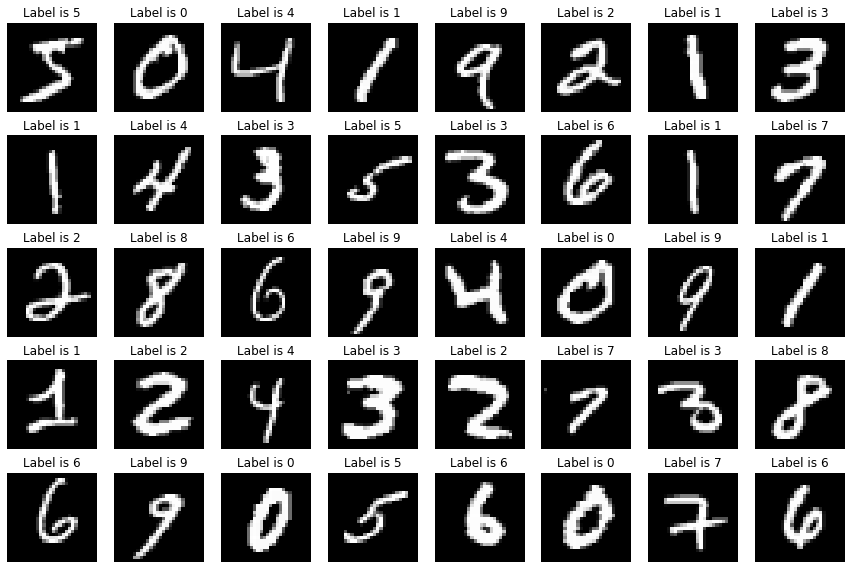

In [3]:
cnt = 0

with open('./MNIST_revise/mnist_train.csv', 'r') as csv_file:
    fig = plt.figure(figsize=(15,10))
    csvreader = csv.reader(csv_file)
    next(csvreader)  # The next() function returns the next item in an iterator.
    for data in csvreader:
        
        # The first column is the label
        label = data[0]

        # The rest of columns are pixels
        pixels = data[1:]
        
        
        pixels = np.array(pixels, dtype = 'int64')
        pixels = pixels.reshape((28, 28))
        
        
        ax = fig.add_subplot(5, 8, cnt+1)
        ax.imshow(pixels, cmap='gray')

        ax.set_title('Label is {label}'.format(label=label))
        plt.axis('off')
        cnt += 1
        if cnt > 39:
            break

## mnist_test.csv

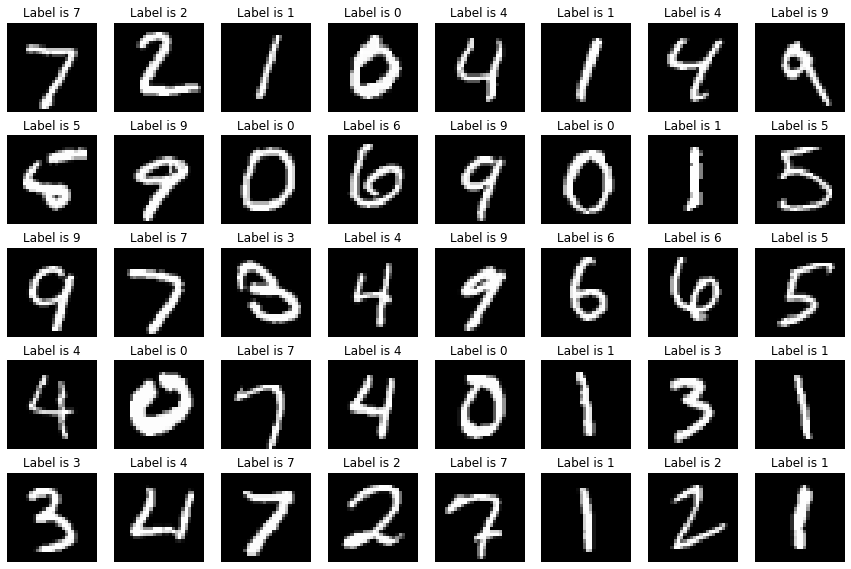

In [4]:
cnt = 0

with open('./MNIST_revise/mnist_test.csv', 'r') as csv_file:
    fig = plt.figure(figsize=(15,10))
    csvreader = csv.reader(csv_file)
    next(csvreader)
    for data in csvreader:
        
        # The first column is the label
        label = data[0]

        # The rest of columns are pixels
        pixels = data[1:]
        
        
        pixels = np.array(pixels, dtype = 'int64')
        pixels = pixels.reshape((28, 28))
        
        
        ax = fig.add_subplot(5, 8, cnt+1)
        ax.imshow(pixels, cmap='gray')

        ax.set_title('Label is {label}'.format(label=label))
        plt.axis('off')
        cnt += 1
        if cnt > 39:
            break

# Step 2: Load Data

In [5]:
train = pd.read_csv("./MNIST_revise/mnist_train.csv")
test  = pd.read_csv("./MNIST_revise/mnist_test.csv")

In [6]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Shuffle

In [8]:
train_shuffled = train.sample(frac=1)

In [9]:
train_shuffled.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
24592,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4901,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27956,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_shuffled = test.sample(frac=1)

In [11]:
test_shuffled.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8675,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1576,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6436,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9574,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training / Testing data

In [12]:
X_train = train_shuffled.drop(labels = ["label"],axis = 1)
Y_train = train_shuffled["label"]

X_test = test_shuffled.drop(labels = ["label"],axis = 1)
Y_test = test_shuffled["label"]


print("Info of training dataset：")
print('# of training samples: {}, Shape: {}'.format(len(train), train.shape))
print('# of training pixels : {}, Shape: {}'.format(len(X_train), X_train.shape))
print('# of classes : {}'.format(len(set(train["label"]))))
print('shape of labels : {}, Shape: {}\n'.format(len(Y_train), Y_train.shape))

print("Info of validation dataset：")
print('# of training samples: {}, Shape: {}'.format(len(test), test.shape))
print('# of training pixels : {}, Shape: {}'.format(len(X_test), X_test.shape))
print('shape of label : {}, Shape: {}'.format(len(Y_test), Y_test.shape))

Info of training dataset：
# of training samples: 60000, Shape: (60000, 785)
# of training pixels : 60000, Shape: (60000, 784)
# of classes : 10
shape of labels : 60000, Shape: (60000,)

Info of validation dataset：
# of training samples: 10000, Shape: (10000, 785)
# of training pixels : 10000, Shape: (10000, 784)
shape of label : 10000, Shape: (10000,)


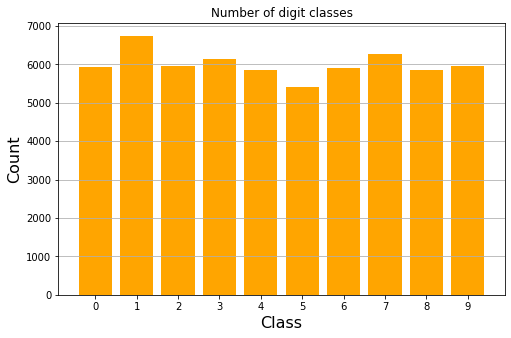

In [13]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.bar(train['label'].value_counts().index, train['label'].value_counts(), color = 'orange')
plt.xticks(np.arange(len(set(train["label"]))))
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title("Number of digit classes")
plt.grid('on', axis='y')

## Dataframe to numpy array

In [14]:
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
24592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y_train

24592    6
24103    0
4901     9
13013    0
27956    7
        ..
2504     6
5736     3
35704    8
36982    2
49899    1
Name: label, Length: 60000, dtype: int64

### Xtrain

In [16]:
Xtrain = X_train.to_numpy().reshape(len(X_train.to_numpy()), 28, 28)

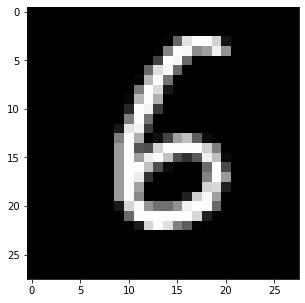

In [17]:
plt.imshow(Xtrain[0], cmap='gray')

### Ytrain

In [18]:
Ytrain = Y_train.to_numpy().astype(np.uint8)

In [19]:
Ytrain[0]

6

### Xtest

In [20]:
Xtest = X_test.to_numpy().reshape(len(X_test.to_numpy()), 28, 28)

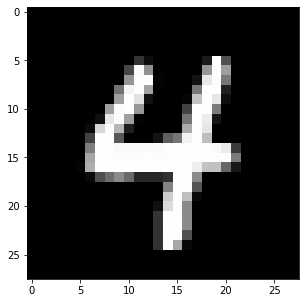

In [21]:
plt.imshow(Xtest[0], cmap='gray')

### Ytest

In [22]:
Ytest = Y_test.to_numpy().astype(np.uint8)

In [23]:
Ytest[0]

4

# Step 3: Build model

## Conv2D

In [24]:
class Conv2D:
    # A Convolution layer using 3x3 filters.
    def __init__(self, num_filters):
        # number of filters
        self.num_filters = num_filters
        
        # filters is a 3d array with dimensions (num_filters, 3, 3)
        self.filters = np.random.randn(num_filters, 3, 3)
    
    def iterate_regions(self, image):
        '''
        Generates all possible 3x3 image regions using valid padding.
        - image is a 2d numpy array.
        '''
        h, w = image.shape # 28x28
        
        for i in range(h - 2):
            for j in range(w - 2):
                img_region = image[i:(i + 3), j:(j + 3)]
                yield img_region, i, j 
                # yield: To end a function, returns a generator (to save memory)
                # Return statement stops the execution of the function. Whereas, yield statement only pauses the execution of the function.

    def forward(self, input):
        '''
        Performs a forward pass of the conv layer using the given input.
        Returns a 3d numpy array with dimensions (h, w, num_filters).
        - input is a 2d numpy array
        '''
        self.last_input = input
        
        h, w = input.shape
        output = np.zeros((h - 2, w - 2, self.num_filters))
        
        # Convolution
        for img_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(img_region * self.filters, axis=(1, 2))
            
        return output
    
    
    def backprop(self, d_L_d_out, lr):
        '''
        Performs a backward pass of the conv layer.
        - d_L_d_out is the loss gradient for this layer's outputs.
        - lr is a float.
        '''
            
        d_L_d_filters = np.zeros(self.filters.shape)
        
        for img_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_L_d_filters[f] += d_L_d_out[i, j, f] * img_region # dL/d filters
                
        #  Update filters
        self.filters -= lr * d_L_d_filters
        
        # We aren't returning anything here since we use Conv3x3 as the first layer in our CNN.
        # Otherwise, we'd need to return the loss gradient for this layer's inputs, just like every
        # other layer in our CNN.
        
        return None
        
        

## MaxPool2D

In [1]:
class MaxPool2D:
    # A Max Pooling layer using a pool size of 2
    
    def iterate_regions(self, image):
        '''
        Generates non-overlapping 2x2 image regions to pool over.
        - image is a 2d numpy array
        '''
        
        h, w, _ = image.shape
        new_h = h // 2 # pool size = 2
        new_w = w // 2
        
        for i in range(new_h):
            for j in range(new_w):
                img_region = image[(i * 2):(i * 2 + 2), (j*2):(j * 2 + 2)]
                yield img_region, i, j
    
    def forward(self, input_use):
        '''
        Performs a forward pass of the maxpool layer using the given input.
        Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
        - input is a 3d numpy array with dimensions (h, w, num_filters)
        '''
        self.last_input = input_use
        
        h, w, num_filters = input_use.shape
        output = np.zeros((h // 2, w // 2, num_filters))
        
        for img_region, i, j in self.iterate_regions(input_use):
            output[i, j] = np.amax(img_region, axis=(0,1))
            
        return output
    
    def backprop(self, d_L_d_out):
        '''
        Performs a backward pass of the maxpool layer.
        Returns the loss gradient for this layer's inputs.
        - d_L_d_out is the loss gradient for this layer's outputs.
        '''
        d_L_d_input = np.zeros(self.last_input.shape)
        
        for img_region, i, j in self.iterate_regions(self.last_input):
            h, w, f = img_region.shape
            amax = np.amax(img_region, axis=(0,1))
            
            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        # If this pixel was the max value, copy the gradient to it.
                        if img_region[i2, j2, f2] == amax[f2]:
                            d_L_d_input[i * 2 + i2, j * 2 + j2, f2] = d_L_d_out[i, j, f2]
                            
        
        return d_L_d_input
        

## Softmax

In [28]:
class Softmax:
    # A standard fully-connected layer with softmax activation.
    
    def __init__(self, input_len, nodes):
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.rand(input_len, nodes) / input_len
        self.biases = np.zeros(nodes)
    
    def forward(self, input):
        '''
        Performs a forward pass of the softmax layer using the given input.
        Returns a 1d numpy array containing the respective probability values.
        - input can be any array with any dimensions.
        '''
        
        self.last_input_shape = input.shape
        
        input = input.flatten()
        self.last_input = input
        
        input_len, nodes = self.weights.shape
        
        totals = np.dot(input, self.weights) + self.biases
        
        self.last_totals = totals
        
        exp = np.exp(totals)
        return exp / np.sum(exp, axis=0)
    
    def backprop(self, d_L_d_out, lr):
        '''
        Performs a backward pass of the softmax layer.
        Returns the loss gradient for this layer's inputs.
        - d_L_d_out is the loss gradient for this layer's outputs.
        - learn_rate is a float.
        '''
        # We know only 1 element of d_L_d_out will be nonzero
        for i, gradient in enumerate(d_L_d_out):
            if gradient == 0:
                continue
            
            # e^totals
            t_exp = np.exp(self.last_totals)
            
            # Sum of all e^totals
            S = np.sum(t_exp)
            
            # Gradients of out[i] against totals
            d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
            d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)
            
            
            # Gradients of totals against weights/biases/input
            d_t_d_w = self.last_input
            d_t_d_b = 1
            d_t_d_inputs = self.weights

            # Gradients of loss against totals
            d_L_d_t = gradient * d_out_d_t

            # Gradients of loss against weights/biases/input
            d_L_d_w = d_t_d_w[np.newaxis].T @ d_L_d_t[np.newaxis]
            d_L_d_b = d_L_d_t * d_t_d_b
            d_L_d_inputs = d_t_d_inputs @ d_L_d_t

            # Update weights / biases
            self.weights -= lr * d_L_d_w
            self.biases -= lr * d_L_d_b

            return d_L_d_inputs.reshape(self.last_input_shape)

## Hyperparameters

In [29]:
num_training = 2000
num_testing = 2000

train_val_split = 0.8

lr = 0.001
epochs = 50
batch_size = 20

In [30]:
num_train = int(num_training * train_val_split)
num_val = int(num_training - num_train)

train_images = Xtrain[:num_train]
train_labels = Ytrain[:num_train]

val_images = Xtrain[num_train:num_train + num_val]
val_labels = Ytrain[num_train:num_train + num_val]

test_images = Xtest[:num_testing]
test_labels = Ytest[:num_testing]


conv = Conv2D(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2D()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 8, 10) # 13x13x8 -> 10

def forward(image, label):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    out = conv.forward((image / 255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)

    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0

    return out, loss, acc

def train(im, label, lr=.005):
    '''
    Completes a full training step on the given image and label.
    Returns the cross-entropy loss and accuracy.
    - image is a 2d numpy array
    - label is a digit
    - lr is the learning rate
    '''
    # Forward
    out, loss, acc = forward(im, label)

    # Calculate initial gradient
    gradient = np.zeros(10)
    gradient[label] = -1 / out[label]

    # Backprop
    gradient = softmax.backprop(gradient, lr)
    gradient = pool.backprop(gradient)
    gradient = conv.backprop(gradient, lr)

    return loss, acc


def validation(im, label):
    # Forward
    out, loss, acc = forward(im, label)
    
    return loss, acc


train_loss = 0
train_acc = 0
val_loss = 0
val_acc = 0


total_loss = 0
total_correct = 0


train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

# Train the CNN for 3 epochs
for epoch in range(epochs):
    print('--- Epoch [%d/%d] ---' % (epoch + 1, epochs))

#     loss = 0
#     num_correct = 0
    
    
    for phase in ['train', 'val']:
        
        
        if phase == 'train':
            
            loss = 0
            acc = 0
            num_correct = 0
            
            total_loss = 0
            total_correct = 0 
            
            
            print("Training")
            for i, (im, label) in enumerate(zip(train_images, train_labels)):
                if i % batch_size == batch_size-1:
                    print(
                    '[%d/%d] Training Average Loss %.2f | Accuracy: %.2f%%' %
                    (i + 1, len(train_images), loss / batch_size, float((num_correct*100)/batch_size))
                    )
                   
                    loss = 0
                    num_correct = 0
                    
                
                train_loss, train_acc = train(im, label, lr)
                loss += train_loss
                num_correct += train_acc
                
                total_loss += train_loss
                total_correct += train_acc 
                
            l = total_loss / len(train_images)
            acc = total_correct / len(train_images)
                
            train_losses.append(l)
            train_accuracy.append(acc)
                    
            
        elif phase == 'val':
            
            loss = 0
            acc = 0
            num_correct = 0
            
            total_loss = 0
            total_correct = 0 
            
            print("Validation")
            for i, (im, label) in enumerate(zip(val_images, val_labels)):
                if i % batch_size == batch_size-1:
                    print(
                    '[%d/%d] Validation Average Loss %.2f | Accuracy: %.2f%%' %
                    (i + 1, len(val_images), loss / batch_size, float((num_correct*100)/batch_size))
                    )
                   
                    loss = 0
                    num_correct = 0
                
                val_loss, val_acc = validation(im, label)
                loss += val_loss
                num_correct += val_acc
                
                total_loss += val_loss
                total_correct += val_acc 
                
            l =  total_loss / len(val_images)
            acc = total_correct / len(val_images)
                
            val_losses.append(l)
            val_accuracy.append(acc)
                

# Test the CNN
print('\n--- Testing the CNN ---')
loss = 0
num_correct = 0

test_loss = []
test_acc = []

for im, label in zip(test_images, test_labels):
    _, l, acc = forward(im, label)
    loss += l
    num_correct += acc
    

num_tests = len(test_images)
print('Test Loss:', loss / num_tests)
print('Test Accuracy:', num_correct / num_tests)

--- Epoch [1/50] ---
Training
[20/1600] Training Average Loss 2.22 | Accuracy: 30.00%
[40/1600] Training Average Loss 2.30 | Accuracy: 25.00%
[60/1600] Training Average Loss 1.47 | Accuracy: 65.00%
[80/1600] Training Average Loss 1.71 | Accuracy: 30.00%
[100/1600] Training Average Loss 1.17 | Accuracy: 55.00%
[120/1600] Training Average Loss 1.07 | Accuracy: 65.00%
[140/1600] Training Average Loss 0.93 | Accuracy: 80.00%
[160/1600] Training Average Loss 1.10 | Accuracy: 60.00%
[180/1600] Training Average Loss 1.08 | Accuracy: 75.00%
[200/1600] Training Average Loss 1.41 | Accuracy: 55.00%
[220/1600] Training Average Loss 0.97 | Accuracy: 75.00%
[240/1600] Training Average Loss 1.09 | Accuracy: 55.00%
[260/1600] Training Average Loss 0.99 | Accuracy: 75.00%
[280/1600] Training Average Loss 0.45 | Accuracy: 85.00%
[300/1600] Training Average Loss 1.62 | Accuracy: 45.00%
[320/1600] Training Average Loss 0.65 | Accuracy: 75.00%
[340/1600] Training Average Loss 1.28 | Accuracy: 55.00%
[360/

[860/1600] Training Average Loss 1.12 | Accuracy: 70.00%
[880/1600] Training Average Loss 0.32 | Accuracy: 80.00%
[900/1600] Training Average Loss 0.32 | Accuracy: 80.00%
[920/1600] Training Average Loss 0.38 | Accuracy: 95.00%
[940/1600] Training Average Loss 0.36 | Accuracy: 80.00%
[960/1600] Training Average Loss 0.86 | Accuracy: 80.00%
[980/1600] Training Average Loss 0.92 | Accuracy: 90.00%
[1000/1600] Training Average Loss 0.42 | Accuracy: 90.00%
[1020/1600] Training Average Loss 0.14 | Accuracy: 95.00%
[1040/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[1060/1600] Training Average Loss 0.36 | Accuracy: 90.00%
[1080/1600] Training Average Loss 0.67 | Accuracy: 85.00%
[1100/1600] Training Average Loss 1.01 | Accuracy: 85.00%
[1120/1600] Training Average Loss 0.43 | Accuracy: 80.00%
[1140/1600] Training Average Loss 0.19 | Accuracy: 95.00%
[1160/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[1180/1600] Training Average Loss 0.23 | Accuracy: 90.00%
[1200/1600] Trainin

[100/400] Validation Average Loss 0.13 | Accuracy: 95.00%
[120/400] Validation Average Loss 0.41 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.11 | Accuracy: 95.00%
[160/400] Validation Average Loss 0.70 | Accuracy: 90.00%
[180/400] Validation Average Loss 0.94 | Accuracy: 80.00%
[200/400] Validation Average Loss 0.27 | Accuracy: 90.00%
[220/400] Validation Average Loss 0.64 | Accuracy: 80.00%
[240/400] Validation Average Loss 0.24 | Accuracy: 95.00%
[260/400] Validation Average Loss 0.37 | Accuracy: 85.00%
[280/400] Validation Average Loss 0.45 | Accuracy: 80.00%
[300/400] Validation Average Loss 0.28 | Accuracy: 90.00%
[320/400] Validation Average Loss 0.31 | Accuracy: 90.00%
[340/400] Validation Average Loss 0.37 | Accuracy: 90.00%
[360/400] Validation Average Loss 0.06 | Accuracy: 100.00%
[380/400] Validation Average Loss 0.31 | Accuracy: 95.00%
[400/400] Validation Average Loss 0.28 | Accuracy: 90.00%
--- Epoch [4/50] ---
Training
[20/1600] Training Average Loss 0.12 | Ac

[520/1600] Training Average Loss 0.21 | Accuracy: 95.00%
[540/1600] Training Average Loss 0.26 | Accuracy: 90.00%
[560/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[580/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.29 | Accuracy: 85.00%
[640/1600] Training Average Loss 0.37 | Accuracy: 95.00%
[660/1600] Training Average Loss 0.26 | Accuracy: 90.00%
[680/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[700/1600] Training Average Loss 0.18 | Accuracy: 95.00%
[720/1600] Training Average Loss 0.29 | Accuracy: 90.00%
[740/1600] Training Average Loss 0.34 | Accuracy: 85.00%
[760/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[780/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.14 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.17 | Accuracy: 95.00%
[840/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[860/1600] Training Aver

[1360/1600] Training Average Loss 0.20 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[1400/1600] Training Average Loss 0.32 | Accuracy: 90.00%
[1420/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[1440/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[1460/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1480/1600] Training Average Loss 0.51 | Accuracy: 90.00%
[1500/1600] Training Average Loss 0.12 | Accuracy: 95.00%
[1520/1600] Training Average Loss 0.31 | Accuracy: 95.00%
[1540/1600] Training Average Loss 0.12 | Accuracy: 95.00%
[1560/1600] Training Average Loss 0.21 | Accuracy: 90.00%
[1580/1600] Training Average Loss 0.13 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.11 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.45 | Accuracy: 75.00%
[40/400] Validation Average Loss 0.65 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.30 | Accuracy: 80.00%
[80/400] Validation Average Loss 0.91 | Accuracy: 90.00%
[1

[180/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.11 | Accuracy: 95.00%
[220/1600] Training Average Loss 0.26 | Accuracy: 90.00%
[240/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[260/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[280/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[300/1600] Training Average Loss 0.33 | Accuracy: 90.00%
[320/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[340/1600] Training Average Loss 0.20 | Accuracy: 95.00%
[360/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[380/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.22 | Accuracy: 95.00%
[420/1600] Training Average Loss 0.15 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.12 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.21 | Accuracy: 95.00%
[480/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[500/1600] Training Average Loss 0.12 | Accuracy: 100.00%
[520/1600] Training A

[1020/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1040/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1060/1600] Training Average Loss 0.10 | Accuracy: 95.00%
[1080/1600] Training Average Loss 0.21 | Accuracy: 95.00%
[1100/1600] Training Average Loss 0.34 | Accuracy: 90.00%
[1120/1600] Training Average Loss 0.10 | Accuracy: 100.00%
[1140/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1160/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1180/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.11 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.19 | Accuracy: 90.00%
[1300/1600] Training Average Loss 0.15 | Accuracy: 95.00%
[1320/1600] Training Average Loss 0.28 | Accuracy: 95.00%
[1340/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[13

[240/400] Validation Average Loss 0.16 | Accuracy: 95.00%
[260/400] Validation Average Loss 0.23 | Accuracy: 95.00%
[280/400] Validation Average Loss 0.50 | Accuracy: 90.00%
[300/400] Validation Average Loss 0.19 | Accuracy: 95.00%
[320/400] Validation Average Loss 0.44 | Accuracy: 85.00%
[340/400] Validation Average Loss 0.38 | Accuracy: 90.00%
[360/400] Validation Average Loss 0.05 | Accuracy: 95.00%
[380/400] Validation Average Loss 0.39 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.32 | Accuracy: 80.00%
--- Epoch [11/50] ---
Training
[20/1600] Training Average Loss 0.05 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.14 | Accuracy: 95.00%
[60/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.28 | Accuracy: 95.00%
[120/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.07 | Accuracy

[660/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[680/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[700/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[720/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[740/1600] Training Average Loss 0.11 | Accuracy: 100.00%
[760/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[780/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.10 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.23 | Accuracy: 95.00%
[880/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.08 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.12 | Accuracy: 95.00%
[980/1600] Training Average Loss 0.21 | Accuracy: 95.00%
[1000/1600] Train

[1480/1600] Training Average Loss 0.21 | Accuracy: 95.00%
[1500/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[1520/1600] Training Average Loss 0.11 | Accuracy: 95.00%
[1540/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1560/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1580/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.04 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.49 | Accuracy: 75.00%
[40/400] Validation Average Loss 0.58 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.48 | Accuracy: 80.00%
[80/400] Validation Average Loss 0.95 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.17 | Accuracy: 95.00%
[120/400] Validation Average Loss 0.43 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.13 | Accuracy: 90.00%
[160/400] Validation Average Loss 0.69 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.05 | Accuracy: 80.00%
[200/400] Validation Average Loss 0.32 | Accuracy: 90.00%
[2

[280/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[300/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[320/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[340/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[360/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[380/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.08 | Accuracy: 95.00%
[480/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.05 | Accuracy: 95.00%
[580/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[620/1600] Traini

[1100/1600] Training Average Loss 0.13 | Accuracy: 100.00%
[1120/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1140/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1160/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1180/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[1300/1600] Training Average Loss 0.08 | Accuracy: 100.00%
[1320/1600] Training Average Loss 0.16 | Accuracy: 95.00%
[1340/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1360/1600] Training Average Loss 0.08 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1400/1600] Training Average Loss 0.11 | Accuracy: 100.00%
[1420/1600] Training Average Loss 0.07 | Accuracy: 100.00

[300/400] Validation Average Loss 0.19 | Accuracy: 95.00%
[320/400] Validation Average Loss 0.57 | Accuracy: 85.00%
[340/400] Validation Average Loss 0.39 | Accuracy: 90.00%
[360/400] Validation Average Loss 0.07 | Accuracy: 95.00%
[380/400] Validation Average Loss 0.48 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.38 | Accuracy: 80.00%
--- Epoch [18/50] ---
Training
[20/1600] Training Average Loss 0.03 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[60/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.12 | Accuracy: 95.00%
[120/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[180/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[220/1600] Training Average Loss 0.07 | Accurac

[700/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[720/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[740/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[760/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[780/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.12 | Accuracy: 100.00%
[880/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[980/1600] Training Average Loss 0.06 | Accuracy: 95.00%
[1000/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1020/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1040/1600] T

[1500/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1520/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1540/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1560/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1580/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.03 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.57 | Accuracy: 75.00%
[40/400] Validation Average Loss 0.56 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.59 | Accuracy: 80.00%
[80/400] Validation Average Loss 0.98 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.19 | Accuracy: 95.00%
[120/400] Validation Average Loss 0.45 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.14 | Accuracy: 90.00%
[160/400] Validation Average Loss 0.69 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.20 | Accuracy: 75.00%
[200/400] Validation Average Loss 0.33 | Accuracy: 90.00%
[220/400] Validation Average Loss 0.66 | Accuracy: 85.00%
[

[300/1600] Training Average Loss 0.09 | Accuracy: 100.00%
[320/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[340/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[360/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[380/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[480/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[580/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[640/1600] Tra

[1120/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1140/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1160/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1180/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[1300/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1320/1600] Training Average Loss 0.08 | Accuracy: 95.00%
[1340/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1360/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1400/1600] Training Average Loss 0.07 | Accuracy: 100.00%
[1420/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1440/1600] Training Average Loss 0.02 | Accuracy: 100.00

[320/400] Validation Average Loss 0.66 | Accuracy: 85.00%
[340/400] Validation Average Loss 0.41 | Accuracy: 90.00%
[360/400] Validation Average Loss 0.07 | Accuracy: 95.00%
[380/400] Validation Average Loss 0.50 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.45 | Accuracy: 80.00%
--- Epoch [25/50] ---
Training
[20/1600] Training Average Loss 0.02 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[60/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[120/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[180/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[220/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[240/1600] Training Average Loss 0.02 | Accura

[720/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[740/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[760/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[780/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.08 | Accuracy: 100.00%
[880/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[980/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1000/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1020/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[1040/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1060/1600]

[1520/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1540/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1560/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1580/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.02 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.61 | Accuracy: 70.00%
[40/400] Validation Average Loss 0.57 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.65 | Accuracy: 80.00%
[80/400] Validation Average Loss 1.02 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.20 | Accuracy: 85.00%
[120/400] Validation Average Loss 0.45 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.14 | Accuracy: 90.00%
[160/400] Validation Average Loss 0.68 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.30 | Accuracy: 75.00%
[200/400] Validation Average Loss 0.33 | Accuracy: 95.00%
[220/400] Validation Average Loss 0.70 | Accuracy: 85.00%
[240/400] Validation Average Loss 0.14 | Accuracy: 95.00%
[2

[320/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[340/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[360/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[380/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[480/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[580/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[640/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[660/1600] Tra

[1140/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1160/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1180/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1300/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1320/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1340/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1360/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1400/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1420/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1440/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1460/1600] Training Average Loss 0.02 | Accuracy: 100.0

[340/400] Validation Average Loss 0.40 | Accuracy: 90.00%
[360/400] Validation Average Loss 0.07 | Accuracy: 95.00%
[380/400] Validation Average Loss 0.51 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.49 | Accuracy: 80.00%
--- Epoch [32/50] ---
Training
[20/1600] Training Average Loss 0.02 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[60/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[120/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[180/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[220/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[240/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[260/1600] Training Average Loss 0.02 | Accura

[740/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[760/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[780/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.06 | Accuracy: 100.00%
[880/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[980/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1000/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1020/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[1040/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1060/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1080/1600

[1540/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1560/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1580/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.02 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.61 | Accuracy: 75.00%
[40/400] Validation Average Loss 0.59 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.70 | Accuracy: 80.00%
[80/400] Validation Average Loss 1.06 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.21 | Accuracy: 85.00%
[120/400] Validation Average Loss 0.45 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.13 | Accuracy: 90.00%
[160/400] Validation Average Loss 0.68 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.37 | Accuracy: 75.00%
[200/400] Validation Average Loss 0.32 | Accuracy: 95.00%
[220/400] Validation Average Loss 0.71 | Accuracy: 85.00%
[240/400] Validation Average Loss 0.15 | Accuracy: 95.00%
[260/400] Validation Average Loss 0.17 | Accuracy: 95.00%
[28

[360/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[380/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[480/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[580/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[640/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[660/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[680/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[700/1600] Tra

[1180/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1300/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1320/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1340/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1360/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1400/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1420/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1440/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1460/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1480/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1500/1600] Training Average Loss 0.02 | Accuracy: 100.0

[380/400] Validation Average Loss 0.51 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.50 | Accuracy: 80.00%
--- Epoch [39/50] ---
Training
[20/1600] Training Average Loss 0.01 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[60/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[120/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[180/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[220/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[240/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[260/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[280/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[300/1600] Training Average Loss 0.04 | Accura

[780/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[880/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[980/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1000/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1020/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[1040/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1060/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1080/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1100/1600] Training Average Loss 0.05 | Accuracy: 100.00%
[1120/16

[1580/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.61 | Accuracy: 80.00%
[40/400] Validation Average Loss 0.60 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.75 | Accuracy: 80.00%
[80/400] Validation Average Loss 1.09 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.21 | Accuracy: 85.00%
[120/400] Validation Average Loss 0.46 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.12 | Accuracy: 90.00%
[160/400] Validation Average Loss 0.69 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.41 | Accuracy: 80.00%
[200/400] Validation Average Loss 0.31 | Accuracy: 95.00%
[220/400] Validation Average Loss 0.72 | Accuracy: 85.00%
[240/400] Validation Average Loss 0.15 | Accuracy: 95.00%
[260/400] Validation Average Loss 0.18 | Accuracy: 95.00%
[280/400] Validation Average Loss 0.65 | Accuracy: 90.00%
[300/400] Validation Average Loss 0.19 | Accuracy: 95.00%
[320/

[380/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[480/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[580/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[640/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[660/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[680/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[700/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[720/1600] Tra

[1180/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1200/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1220/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1240/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1260/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1280/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1300/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1320/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1340/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1360/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1380/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1400/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[1420/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1440/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1460/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1480/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1500/1600] Training Average Loss 0.01 | Accuracy: 100.0

[380/400] Validation Average Loss 0.51 | Accuracy: 90.00%
[400/400] Validation Average Loss 0.51 | Accuracy: 80.00%
--- Epoch [46/50] ---
Training
[20/1600] Training Average Loss 0.01 | Accuracy: 95.00%
[40/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[60/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[80/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[100/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[120/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[140/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[160/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[180/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[200/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[220/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[240/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[260/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[280/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[300/1600] Training Average Loss 0.03 | Accura

[780/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[800/1600] Training Average Loss 0.03 | Accuracy: 100.00%
[820/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[840/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[860/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[880/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[900/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[920/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[940/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[960/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[980/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1000/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1020/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[1040/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1060/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1080/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[1100/1600] Training Average Loss 0.04 | Accuracy: 100.00%
[1120/16

[1580/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[1600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
Validation
[20/400] Validation Average Loss 0.60 | Accuracy: 80.00%
[40/400] Validation Average Loss 0.61 | Accuracy: 90.00%
[60/400] Validation Average Loss 1.78 | Accuracy: 80.00%
[80/400] Validation Average Loss 1.12 | Accuracy: 90.00%
[100/400] Validation Average Loss 0.21 | Accuracy: 85.00%
[120/400] Validation Average Loss 0.47 | Accuracy: 95.00%
[140/400] Validation Average Loss 0.12 | Accuracy: 95.00%
[160/400] Validation Average Loss 0.69 | Accuracy: 90.00%
[180/400] Validation Average Loss 1.46 | Accuracy: 80.00%
[200/400] Validation Average Loss 0.31 | Accuracy: 95.00%
[220/400] Validation Average Loss 0.72 | Accuracy: 85.00%
[240/400] Validation Average Loss 0.15 | Accuracy: 95.00%
[260/400] Validation Average Loss 0.18 | Accuracy: 95.00%
[280/400] Validation Average Loss 0.65 | Accuracy: 90.00%
[300/400] Validation Average Loss 0.19 | Accuracy: 95.00%
[320/

[380/1600] Training Average Loss 0.00 | Accuracy: 100.00%
[400/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[420/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[440/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[460/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[480/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[500/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[520/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[540/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[560/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[580/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[600/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[620/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[640/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[660/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[680/1600] Training Average Loss 0.01 | Accuracy: 100.00%
[700/1600] Training Average Loss 0.02 | Accuracy: 100.00%
[720/1600] Tra

In [31]:
print("Training loss: ", train_losses)
print("Training accuracy: ", train_accuracy)

print("Validation loss:", val_losses)
print("Validation accuracy: ", val_accuracy)


Training loss:  [0.7781691934751724, 0.4088019535444471, 0.30978767683461716, 0.2509349073613541, 0.21099697675992818, 0.18094920960375224, 0.15700035983221866, 0.13726580623838275, 0.12069206095797848, 0.10671819771803143, 0.09496350305651123, 0.08506454487722692, 0.0766782727395438, 0.06951773170520906, 0.06335943269366813, 0.05803295500947513, 0.05340340253298176, 0.04936043924497265, 0.04581800486770841, 0.04271120452595627, 0.039985267116881856, 0.037587380158974934, 0.03546746591289779, 0.03358169544818093, 0.03189372262315938, 0.030373979322575573, 0.028998423623824553, 0.02774737903228628, 0.026604604262702215, 0.02555657624023679, 0.024591941043343578, 0.02370109180507453, 0.022875841773259454, 0.022109168825921996, 0.021395013954469192, 0.020728120819687085, 0.020103906836888345, 0.019518358684730525, 0.018967946908729817, 0.018449555590321565, 0.017960424008921023, 0.017498097933250606, 0.01706038870729254, 0.016645338694252818, 0.01625119194377036, 0.01587636917843612, 0.01

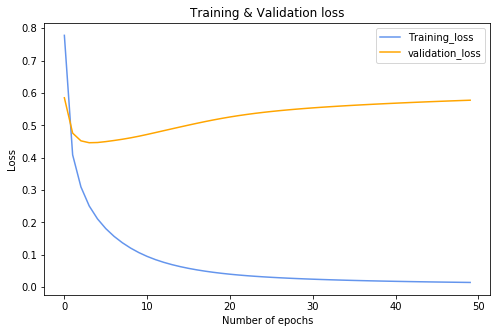

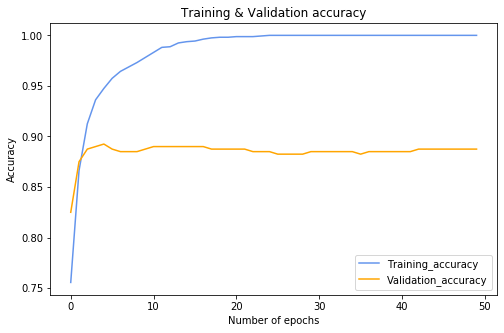

In [32]:
plt.plot(train_losses, color='cornflowerblue', label='Training_loss')
plt.plot(val_losses, color='orange', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

plt.plot(train_accuracy, color='cornflowerblue', label='Training_accuracy')
plt.plot(val_accuracy, color='orange', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

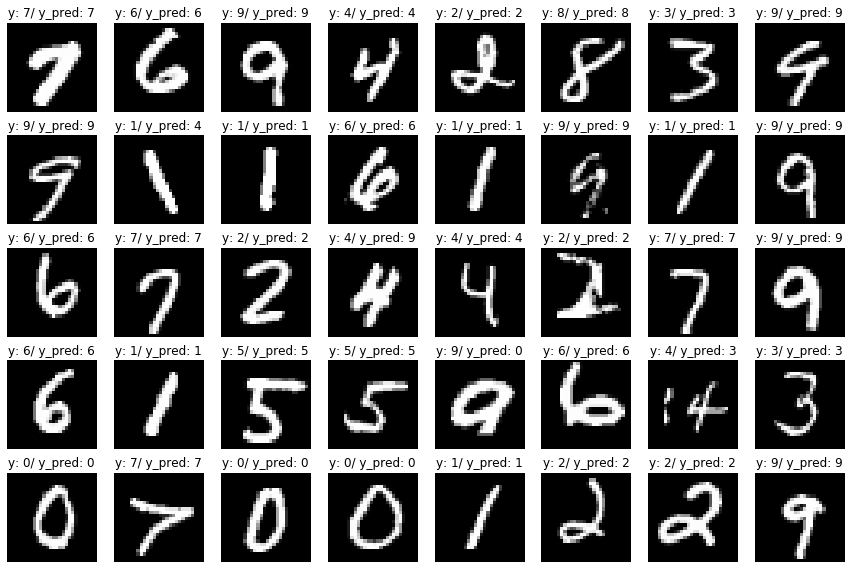

In [34]:
import random

random.seed(10)
r = random.randint(1,100)
fig = plt.figure(figsize=(15,10))

test_acc
for i in range(40):  
    out, _, _ = forward(Xtest[i+r], Ytest[i+r])
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i+r], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=Ytest[i+r], y_hat=np.argmax(out)))
    plt.axis('off')